## Self-Study Colab Activity 8.3: Using Validation to Select the Best Combination of Parameters

**Expected Time: 60 Minutes**


This activity focuses on using a train/test split to select the best hyperparameters for a linear regression model complexity.  You will become familiar with scikit-learn's `train_test_split` function to generate a train/test split and use the results to evaluate the appropriate model complexity.  The datasets used are synthetic so as to allow a comparison with the learned best complexity to that which generated the data.  

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

### Three Synthetic Datasets

Below, polynomial functions of different degrees were created, and noise was added to generate three basic synthetic datasets.  The relationships are then plotted. They are of varying true complexity -- cubic, quadratic, and quintic (polynomials of degree 5).  Your goal is to use cross-validation to determine the appropriate model and examine its mean squared error on a set of validation data. 

In [2]:
df = pd.read_csv('data/synthetic_8.6.csv')

In [3]:
df.head()

,x,y1,y2,y3
0,-2.000000,-0.522368,5.698300,3.880352
1,-1.929293,-0.711336,-0.257942,8.643553
2,-1.858586,-4.759917,12.775233,6.116844
3,-1.787879,-10.255472,22.140157,12.493956
4,-1.717172,-3.503845,27.656110,10.335220


**Plots of the Synthetic Datasets**

<img src = 'images/quad.png'/><img src = 'images/quintic.png'/><img src = 'images/cubic.png'/>

[Back to top](#Index:) 

### Problem 1

#### Creating the Train and Test sets


The scikit-learn library has a built-in function called `train_test_split` that accepts one or many arrays and returns a randomized split of the data.  Use the `train_test_split` function to split `x` and `y1` into train and test sets.  Set `random_state = 32` and create a test set using 30% of the data.  Assign your results as arrays to `X_train, X_test, y1_train, y1_test` below.  

- In anticipation of using `LinearRegression` estimator, make sure your `X_train` and `X_test` are of shapes (70, 1) and (30, 1) respectively.

In [7]:


X_train, X_test, y1_train, y1_test = train_test_split(df[['x']], df[['y1']], test_size= 0.3, random_state= 32)


# Answer check
print(df['x'].shape, X_train.shape, X_test.shape)
print(X_train.head())

(100,) (70, 1) (30, 1)
           x
91  4.434343
21 -0.515152
61  2.313131
0  -2.000000
31  0.191919


[Back to top](#Index:) 

### Problem 2


Use the `train_test_split` function to create similar splits of `y2` and `y3`.  Use the `random_state = 32` and create a test set using 30% of the data.   Assign your results to `y2_train`, `y2_test`, `y3_train`, and `y3_test` below.  

In [8]:


y2_train, y2_test, y3_train, y3_test  = train_test_split(df[['y2']], df[['y3']], test_size= 0.3, random_state= 32)



# Answer check
print(df['y2'].shape, y2_train.shape, y2_test.shape)
print(y2_train.head())

(100,) (70, 1) (30, 1)
            y2
91 -173.744136
21  -28.021552
61  -15.806732
0     5.698300
31  -21.696552


[Back to top](#Index:) 

### Problem 3


Use a `for` loop to loop over the values from one to 20. For each iteration `i`:

- Use `Pipeline` to create a pipeline object. Inside the pipeline object define a a tuple where the first element is a string identifier `pfeat` and the second element is an instance of `PolynomialFeatures` of degree `i` with `include_bias = False`. Inside the pipeline define another tuple where the first element is a string identifier `linreg`, and the second element is an instance of `LinearRegression`. Assign the pipeline object to the variable `pipe`.
- Use the `fit` function on `pipe` to train your model on `X_train` and `y1_train`. Assign the result to `train_preds`.
- Use the `predict` function on `pipe` to compute your prediction on `X_test`. Assign the result to `test_preds`.
- Use the `mean_squared_error` function to calculate the MSE between `y1_train` and `train_preds`. Append your result to the `train_mses` list.
- Use the `mean_squared_error` function to calculate the MSE between `y1_test` and `test_preds`. Append your result to the `test_mses` list.

In [17]:


train_mses = []
test_mses = []

#for complexity 1 - 20:

    #create pipeline with PolynomialFeatures and LinearRegression
    #remember to set include_bias = False
    
    #fit pipeline on training data
    
    #mse of training data
    
    #mse of testing data
for i in range(1, 21):
    pipe = Pipeline(
        [('pfeat', PolynomialFeatures(degree= i, include_bias= False)), 
         ('linreg', LinearRegression())])
    train_preds = pipe.fit(X_train, y1_train)
    train_preds = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)
    train_mses.append(mean_squared_error(y1_train, train_preds))
    test_mses.append(mean_squared_error(y1_test, test_preds))

best_model_complexity = ''


# Answer check

Uncomment the code below to visualize the results of your model fitting.  Note that the data in `y1` were created from a quadratic model originally.

The Complexity that minimized Test Error was: 2


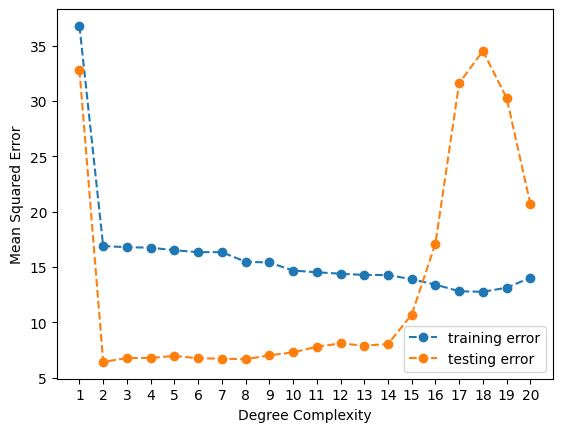

In [18]:
print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.plot(range(1, 21), train_mses, '--o', label = 'training error')
plt.plot(range(1, 21), test_mses, '--o', label = 'testing error')
plt.xticks(range(1, 21), range(1, 21))
plt.xlabel('Degree Complexity')
plt.ylabel('Mean Squared Error')
plt.legend();

[Back to top](#Index:) 

### Problem 4

#### Write a function to determine best model complexity



Complete the definition of the `simple_cross_validation` function according to the following instructions:


Use a `for` loop to loop over the values from one to 20. For each iteration `i`:

- Use `Pipeline` to create a pipeline object. Inside the pipeline object define a a tuple where the first element is a string identifier `pfeat` and the second element is an instance of `PolynomialFeatures` of degree `i` with `include_bias = False`. Inside the pipeline define another tuple where the first element is a string identifier `linreg`, and the second element is an instance of `LinearRegression`. Assign the pipeline object to the variable `pipe`.
- Use the `fit` function on `pipe` to train your model on `X_train` and `y_train`. 
- Use the `predict` function on `pipe` to compute your prediction on `X_test`. Assign the result to `test_preds`.
- Use the `mean_squared_error` function to calculate the MSE between `y_test` and `test_preds`. Assign your result to `test_mse`.
- Use an `if` statement to check that `test_mse` is less than `best_mse`:
    - If the condition is satisifed assign `test_mse` to `best_mse` and `pipe` to `best_pipe`.
- Your function should return `best_pipe`.

In [19]:


def simple_cross_validation(X_train, y_train, X_test, y_test):
    best_pipe = None #placeholder for best model
    best_mse = np.inf #set best mse to infinity to begin
    #for complexity 1 - 20:

        #create pipeline with PolynomialFeatures and LinearRegression
        #remember to set include_bias = False

        #fit pipeline on training data

        #mse of testing data
        
        #if mse is best -- set best_pipe = pipe
        
        #return best pipeline
    for i in range(1, 21):
         pipe = Pipeline(
              [('pfeat', PolynomialFeatures(degree= i, include_bias= False)), 
               ('linreg', LinearRegression())])
         pipe.fit(X_train, y_train)
         test_preds = pipe.predict(X_test)
         test_mse = mean_squared_error(y_test, test_preds)
         if test_mse < best_mse:
              best_mse = test_mse
              best_pipe = pipe
    return best_pipe
    


best_model = simple_cross_validation(X_train, y2_train, X_test, y2_test)
best_model.get_params() #should be degree = 10

{'memory': None,
 'steps': [('pfeat', PolynomialFeatures(degree=10, include_bias=False)),
  ('linreg', LinearRegression())],
 'transform_input': None,
 'verbose': False,
 'pfeat': PolynomialFeatures(degree=10, include_bias=False),
 'linreg': LinearRegression(),
 'pfeat__degree': 10,
 'pfeat__include_bias': False,
 'pfeat__interaction_only': False,
 'pfeat__order': 'C',
 'linreg__copy_X': True,
 'linreg__fit_intercept': True,
 'linreg__n_jobs': None,
 'linreg__positive': False}